# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [73]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import IndexSlice as idx
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Complete_Study_df = pd.merge(study_results, mouse_metadata, how="outer", on = "Mouse ID")
# Display the data table for preview
Complete_Study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(Complete_Study_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Dup_ID = Complete_Study_df["Mouse ID"].loc[Complete_Study_df.duplicated(subset=["Mouse ID","Timepoint"])].unique()
Dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#Drop_ID = Complete_Study_df.loc[Complete_Study_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
#Drop_ID
Drop_ID = Complete_Study_df.loc[Complete_Study_df["Mouse ID"]==Dup_ID[0]]

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#Merge original complete study dataframe with duplicate IDs and add an indicator column
Complete_Study_df = Complete_Study_df.merge(Drop_ID, how='left', indicator=True)

#Perform an operation that only keeps rows that were not identified in "Drop_ID"
Complete_Study_df = Complete_Study_df[Complete_Study_df['_merge']=='left_only']

#Drop the indicator column
Complete_Study_df = Complete_Study_df.drop(columns = "_merge")

In [6]:
# Checking the number of mice in the clean DataFrame.
len(Complete_Study_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Average = Complete_Study_df.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
Median = Complete_Study_df.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
Variance = Complete_Study_df.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
St_Dev = Complete_Study_df.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
St_Er = Complete_Study_df.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
per_regimen_summary_og = pd.concat([Average,Median,Variance,St_Dev,St_Er],axis=1,keys=["Mean Tumor Volume",
                               "Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.",
                                                                               "Tumor Volume Std. Err."])

per_regimen_summary_og

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
per_regimen_summary = Complete_Study_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)": \
                                                                             ["mean","median","var","std","sem"]})
per_regimen_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

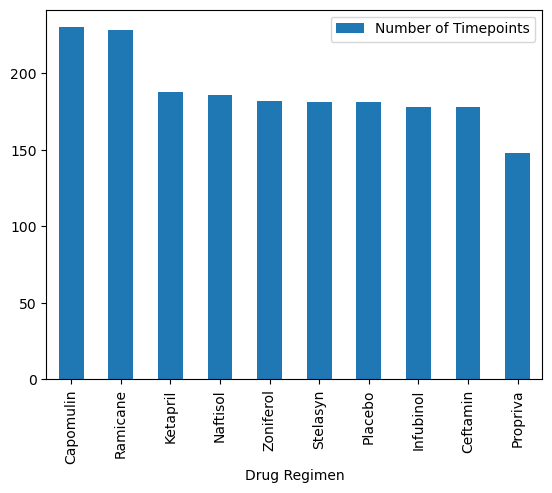

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
x_pan = np.arange(len(per_regimen_summary.index))
y_pan = Complete_Study_df["Drug Regimen"].value_counts()
plot_df = pd.DataFrame({"Drug Regimen":x_pan,"Number of Timepoints":y_pan},index=y_pan.index)
bplot = plot_df.plot(x="Drug Regimen",y="Number of Timepoints",kind="bar")
bplot.set_xticklabels(y_pan.index)
plt.show()

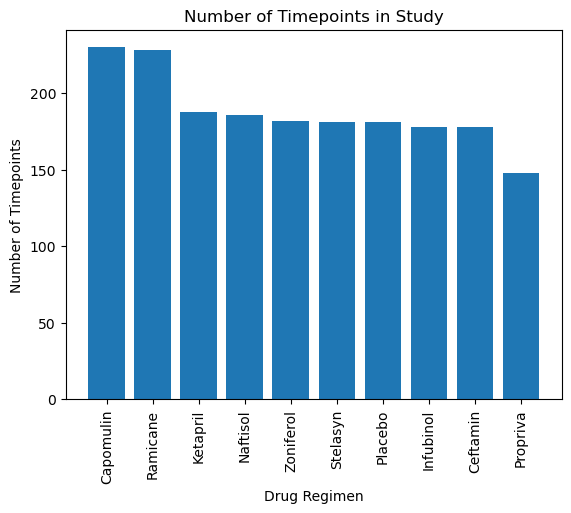

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_py = np.arange(len(per_regimen_summary.index))
y_py = Complete_Study_df["Drug Regimen"].value_counts()
plt.bar(x_py,y_py)
plt.xticks(ticks = x_py, labels = y_py.index,rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints in Study")
plt.show()

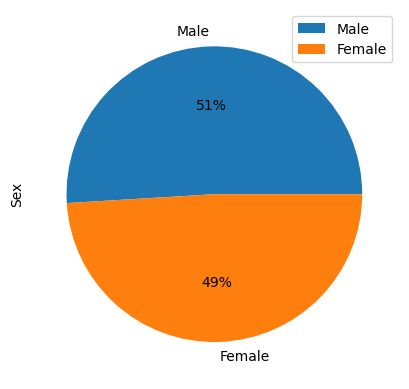

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
y_pan_pie = Complete_Study_df["Sex"].value_counts()
plot_pie_df = pd.DataFrame({"Sex":y_pan_pie})
pplot = plot_pie_df.plot(y="Sex",kind="pie",autopct='%1.0f%%')

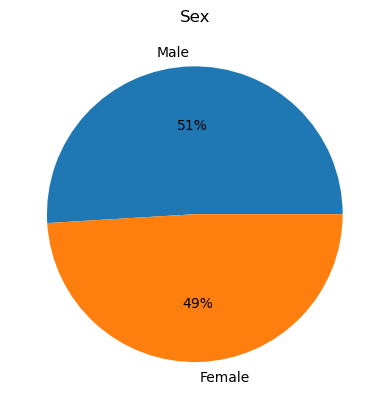

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y_py_pie = Complete_Study_df["Sex"].value_counts()
plt.pie(y_py_pie,labels=y_py_pie.index,autopct='%1.0f%%')
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (for each relevant treatment)
Final_Timepoint_df = Complete_Study_df[["Mouse ID","Drug Regimen","Timepoint"]]\
                                           .loc[Complete_Study_df["Drug Regimen"] \
                                           .isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]\
                                           .groupby(["Mouse ID","Drug Regimen"]).max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_Tumor_df = Complete_Study_df.merge(Final_Timepoint_df,on=["Timepoint","Mouse ID","Drug Regimen"]) \
                                  .loc[:,["Mouse ID","Drug Regimen","Tumor Volume (mm3)"]] \
                                  .set_index(["Drug Regimen"]).sort_index()

                       Timepoint
Mouse ID Drug Regimen           
a203     Infubinol            45
a251     Infubinol            45
a275     Ceftamin             45
a411     Ramicane             45
a444     Ramicane             45
...                          ...
y769     Ceftamin             45
y793     Capomulin            45
y865     Ceftamin             45
z578     Ramicane             45
z581     Infubinol            45

[100 rows x 1 columns]


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,b128,38.982878
Capomulin,r554,32.377357
Capomulin,s185,23.343598
Capomulin,b742,38.939633
Capomulin,x401,28.484033
...,...,...
Ramicane,c758,33.397653
Ramicane,i334,36.374510
Ramicane,r811,37.225650


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment_List = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Plot = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Quan = Final_Tumor_df.groupby(["Drug Regimen"]).quantile([.25,.5,.75],numeric_only=True)
print(Quan)
#Subset_Index = 0
for treatment in Treatment_List:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Current_df = Final_Tumor_df.loc[treatment]
    
    # add subset 
    Tumor_Plot.append(Current_df["Tumor Volume (mm3)"])
    #Subset_Index = len(Tumor_Plot)+1
    
    # Determine outliers using upper and lower bounds

                   Tumor Volume (mm3)
Drug Regimen                         
Capomulin    0.25           32.377357
             0.50           38.125164
             0.75           40.159220
Ceftamin     0.25           48.722078
             0.50           59.851956
             0.75           64.299830
Infubinol    0.25           54.048608
             0.50           60.165180
             0.75           65.525743
Ramicane     0.25           31.560470
             0.50           36.561652
             0.75           40.659006


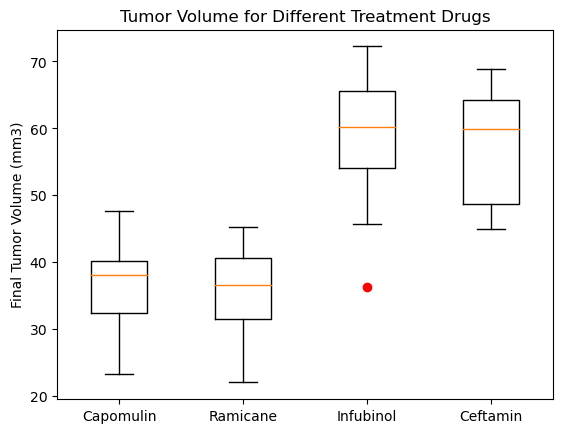

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(Tumor_Plot,labels=Treatment_List,sym="ro")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume for Different Treatment Drugs")
plt.show()

## Line and Scatter Plots

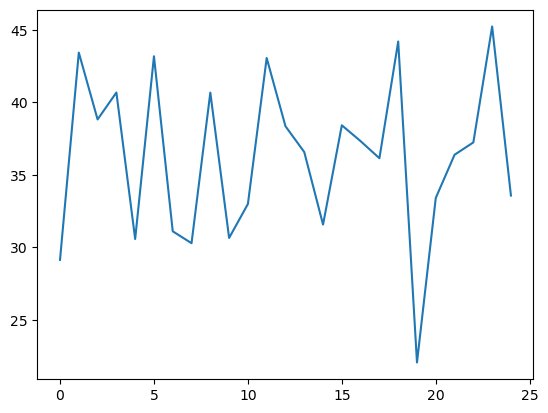

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_values = Complete_Study_df["Timepoint"].loc[(Complete_Study_df["Drug Regimen"]=="Capomulin")\
                                              &(Complete_Study_df["Drug Regimen"]=="Capomulin")]
plt.plot()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

